In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import LASCO_catalog as lasco
import flare_persist as fp
import pandas as pd
import matplotlib as plt
import numpy as np

C:\ProgramData\Anaconda3\lib\site-packages\sunpy\lightcurve\__init__.py:18: SunpyDeprecationWarning: As of v0.8.0, the `sunpy.lightcurve` module is deprecated and will be removed in a future version. Use `sunpy.timeseries` or `sunpy.map` for coordinate transformations.
  _SunpyDeprecationWarning)


In [64]:
#lasco_df = lasco.read_lasco_cat()
lasco_df = pd.read_csv("LASCO_cat.csv")

In [65]:
flare_df = pd.read_excel("ControlEvents_student.xls")
#flare_df = flare_df.iloc[4000:4199] 

In [ ]:
flare_df = lasco.add_cme_width(flare_df,lasco_df)
flare_df = fp.flare_persistence(flare_df,12)

In [ ]:
#adding y label column indicating positive and negative SEP events - SEP events have Association = ProtonFlare
flare_df['sep'] = flare_df.Association.str.contains('^Proton').astype(int)

#convert the type II and type IV association to binary 
flare_df.TypeII = (flare_df.TypeII.str.lower() == "yes").astype(int)
flare_df.TypeIV = (flare_df.TypeIV.str.lower() == "yes").astype(int)

# Remove rows where optlocation = nan
flare_df = flare_df[flare_df.optlocation.astype('str') != 'nan']

#drop 7 samples where dfTrain FlrIntFlux2 is erroneously greater than 1000.0 (all control events)
flare_df = flare_df[flare_df.FlrIntFlux2 < 1000.0]

#replace all -1 cmespeed values with NaN
flare_df.cmespeed.replace(-1,np.nan, inplace = True)

In [ ]:
#flare_df = flare_df.dropna(how='any')

In [ ]:
flare_df.to_csv('ML_test.csv')

In [63]:
flare_df.FlarePersistence

4000    0.000008
4002    0.000160
4003    0.000160
4004    0.000160
4005    0.000057
4006    0.000160
4009    0.000013
4010    0.000002
4011    0.000010
4012    0.000010
4013    0.000007
4014    0.000067
4015    0.000120
4016    0.000120
4017    0.000003
4018    0.000004
4019    0.000006
4021    0.000003
4022    0.000007
4023    0.000009
4024    0.000013
4025    0.000009
4027    0.000015
4028    0.000007
4030    0.000009
4033    0.000010
4034    0.000013
4035    0.000033
4036    0.000033
4037    0.000033
          ...   
4156    0.000000
4157    0.000007
4158    0.000004
4160    0.000010
4161    0.000009
4162    0.000008
4163    0.000008
4164    0.000019
4165    0.000002
4167    0.000010
4168    0.000007
4169    0.000016
4171    0.000000
4172    0.000004
4173    0.000007
4175    0.000004
4176    0.000010
4177    0.000007
4178    0.000010
4180    0.000034
4181    0.000014
4182    0.000008
4183    0.000022
4184    0.000022
4186    0.000008
4189    0.000003
4190    0.000003
4191    0.0000

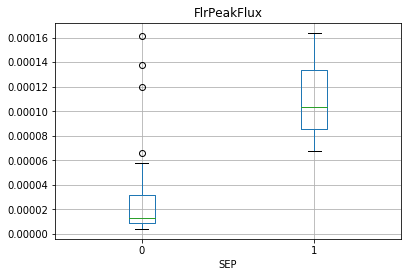

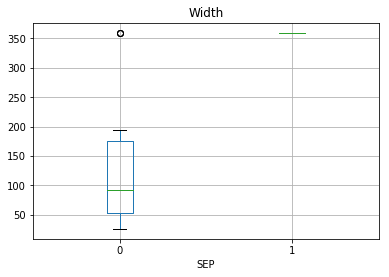

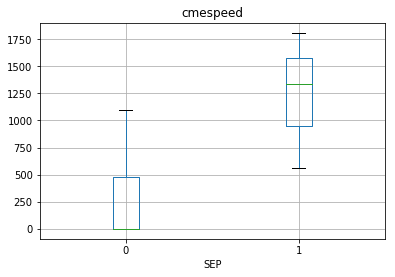

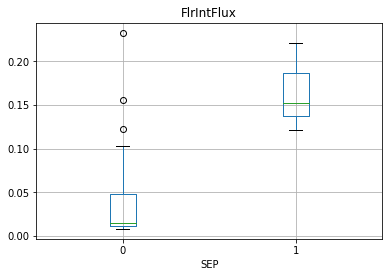

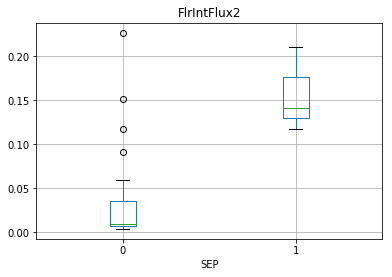

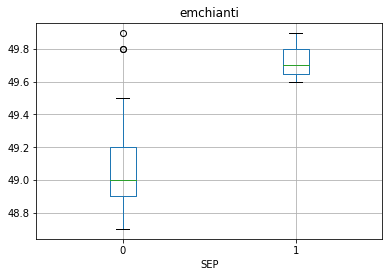

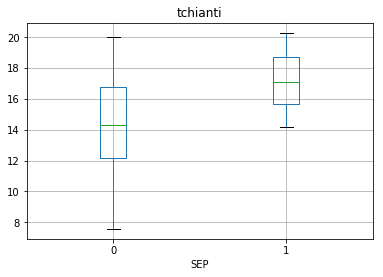

KeyError: 'Column not found: FlarePersistence8'

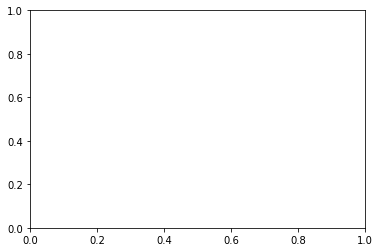

In [43]:
import matplotlib.pyplot as plt
import numpy as np


#plt.subplot(3,3,1)
boxplt = flare_df.boxplot(column = 'FlrPeakFlux',by = 'sep',layout = (1,1))
[ax_tmp.set_xlabel('SEP') for ax_tmp in np.asarray(boxplt).reshape(-1)]
fig = np.asarray(boxplt).reshape(-1)[0].get_figure()
fig.suptitle('')


boxplt = flare_df.boxplot(column = 'Width',by = 'sep',layout = (1,1))
[ax_tmp.set_xlabel('SEP') for ax_tmp in np.asarray(boxplt).reshape(-1)]
fig = np.asarray(boxplt).reshape(-1)[0].get_figure()
fig.suptitle('')
#plt.show()

boxplt = flare_df.boxplot(column = 'cmespeed',by = 'sep',layout = (1,1))
[ax_tmp.set_xlabel('SEP') for ax_tmp in np.asarray(boxplt).reshape(-1)]
fig = np.asarray(boxplt).reshape(-1)[0].get_figure()
fig.suptitle('')
plt.show()

boxplt = flare_df.boxplot(column = 'FlrIntFlux',by = 'sep',layout = (1,1))
[ax_tmp.set_xlabel('SEP') for ax_tmp in np.asarray(boxplt).reshape(-1)]
fig = np.asarray(boxplt).reshape(-1)[0].get_figure()
fig.suptitle('')
plt.show()

boxplt = flare_df.boxplot(column = 'FlrIntFlux2',by = 'sep',layout = (1,1))
[ax_tmp.set_xlabel('SEP') for ax_tmp in np.asarray(boxplt).reshape(-1)]
fig = np.asarray(boxplt).reshape(-1)[0].get_figure()
fig.suptitle('')
plt.show()

boxplt = flare_df.boxplot(column = 'emchianti',by = 'sep',layout = (1,1))
[ax_tmp.set_xlabel('SEP') for ax_tmp in np.asarray(boxplt).reshape(-1)]
fig = np.asarray(boxplt).reshape(-1)[0].get_figure()
fig.suptitle('')
plt.show()

boxplt = flare_df.boxplot(column = 'tchianti',by = 'sep',layout = (1,1))
[ax_tmp.set_xlabel('SEP') for ax_tmp in np.asarray(boxplt).reshape(-1)]
fig = np.asarray(boxplt).reshape(-1)[0].get_figure()
fig.suptitle('')
plt.show()

boxplt = flare_df.boxplot(column = 'FlarePersistence8',by = 'sep',layout = (1,1))
[ax_tmp.set_xlabel('SEP') for ax_tmp in np.asarray(boxplt).reshape(-1)]
fig = np.asarray(boxplt).reshape(-1)[0].get_figure()
fig.suptitle('')
plt.show()


In [ ]:
import numpy as np
x = np.nan

In [ ]:
flare_df

In [ ]:
var = 'FlrOnset'

In [ ]:
lasco_df